In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cat = """user
churches
resorts
beaches
parks
theatres
museums
malls
zoo
restaurants
pubs/bars
local services
burger/pizza shops
hotels/other lodgings
juice bars
art galleries
dance clubs
swimming pools
gyms
bakeries
beauty & spas
cafes
view points
monuments
gardens"""
columns_list = cat.split("\n")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/google_review_ratings.csv', names=columns_list, header=0,index_col=False)
data = data.set_index('user')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [ ]:
review = data
print(review.shape)
review.head()

(5456, 24)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
user,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5455 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15 

In [ ]:
# 결측치 확인
review.isnull().sum()

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

In [ ]:
# 사용할 열만 추출
review = review.loc[:, ['beaches', 'parks', 'theatres', 'malls', 'zoo', 'restaurants', 'art galleries', 'swimming pools', 'beauty & spas', 'view points', 'monuments']]
review.head()

,beaches,parks,theatres,malls,zoo,restaurants,art galleries,swimming pools,beauty & spas,view points,monuments
user,,,,,,,,,,,
User 1,3.63,3.65,5.0,5.0,2.35,2.33,1.74,0.5,0.0,0.0,0.0
User 2,3.63,3.65,5.0,5.0,2.64,2.33,1.74,0.5,0.0,0.0,0.0
User 3,3.63,3.63,5.0,5.0,2.64,2.33,1.74,0.5,0.0,0.0,0.0
User 4,3.63,3.63,5.0,5.0,2.35,2.33,1.74,0.5,0.0,0.0,0.0
User 5,3.63,3.63,5.0,5.0,2.64,2.33,1.74,0.5,0.0,0.0,0.0


In [ ]:
# 카테고리별 평점 평균
mean_review = review.mean().sort_values(ascending=False)
mean_review

malls             3.351395
restaurants       3.126019
theatres          2.958941
parks             2.796886
zoo               2.540795
beaches           2.489331
art galleries     2.206573
view points       1.750537
monuments         1.531453
beauty & spas     1.000071
swimming pools    0.949203
dtype: float64

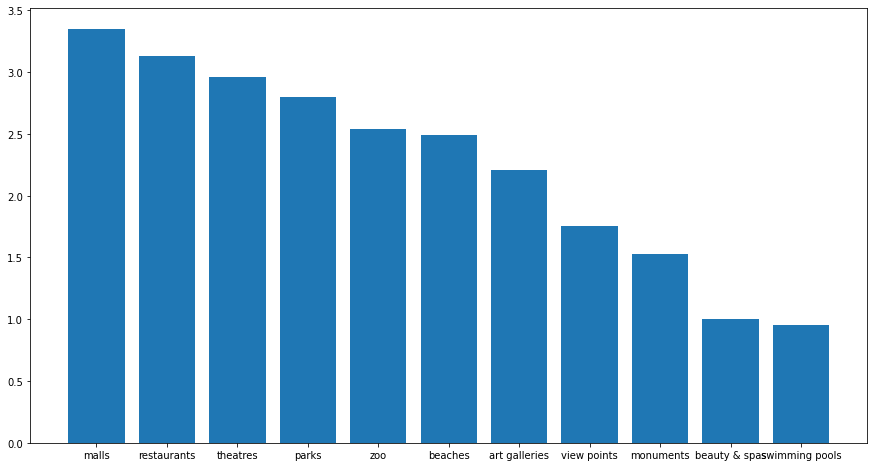

In [ ]:
plt.figure(figsize=(15, 8))
label = ['malls', 'restaurants', 'theatres', 'parks', 'zoo', 'beaches', 'art galleries', 'view points', 'monuments', 'beauty & spas', 'swimming pools']
plt.bar(label, mean_review)
plt.show()